In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
%matplotlib inline

In [3]:
df = pd.read_json('../data/nuts-data.json', orient='records')

In [4]:
df = df.set_index('code')

In [5]:
""" Csoportok hozok létre, országonként """

import re

indices = df.index.values
indices

indices_grouped = []
pattern = indices[0][:2]
group = []

for i in range(0, len(indices) - 1):
    if not indices[i][:2] == indices[i + 1][:2]:
        group.append(indices[i]) 
        indices_grouped.append(group)
        pattern = indices[i + 1][:2]
        group = []
        continue
    
    group.append(indices[i])    
    
    if i == (len(indices) - 2):
        indices_grouped.append(group)

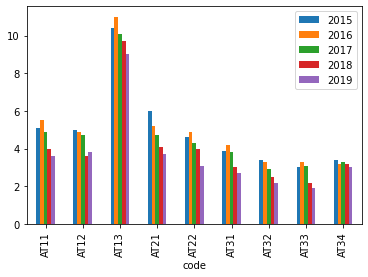

In [6]:
df.loc[indices_grouped[0]].plot(kind='bar')

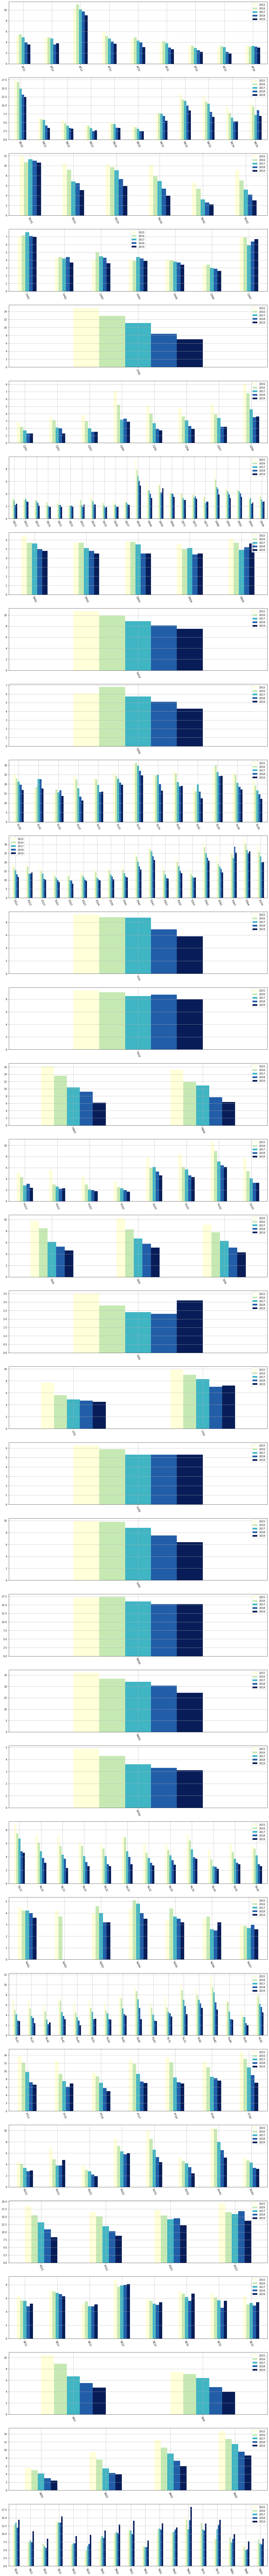

In [49]:
rows = 34
cols = 1

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 150))

i = 0

for r in range(0, rows):
    for c in range(0, cols):
        if i == len(indices_grouped):
            break
            
        df.loc[indices_grouped[i]].plot(kind='bar', ax=axes[r], grid=True, colormap='YlGnBu', rot=-65)
        axes[r].xaxis.set_label_text('')
        i = i + 1
        
fig.tight_layout(pad=2.0)
plt.savefig('grouped_numerical_comparison.jpg', dpi=400)

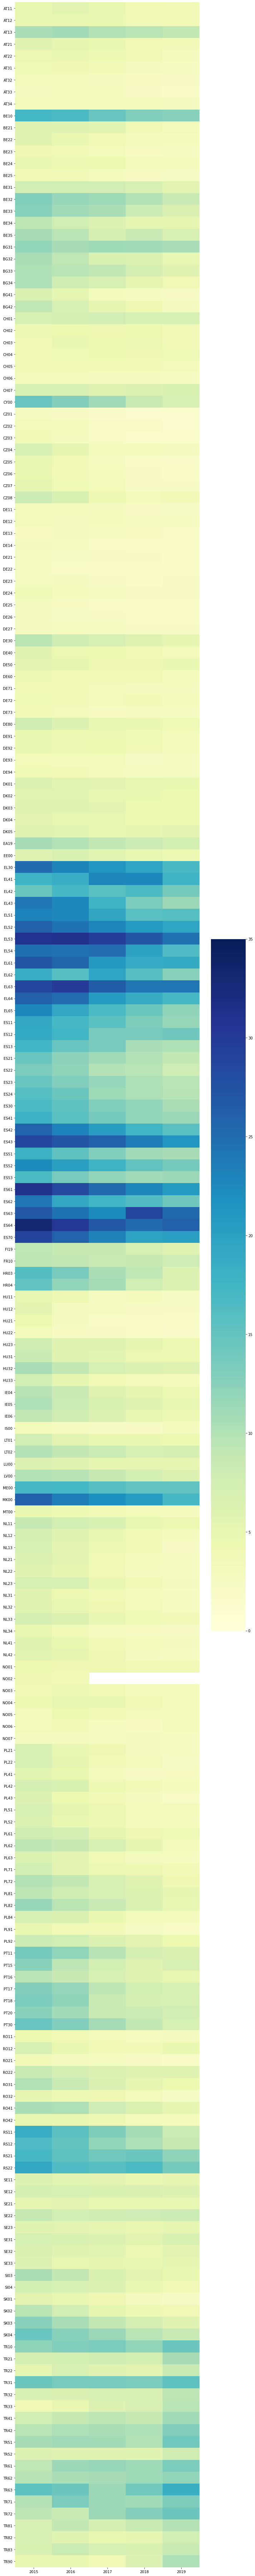

In [52]:
temp = df[['2015', '2016', '2017', '2018', '2019']]

plt.figure(figsize=(10, 100))

ax = sb.heatmap(temp, vmin=0, vmax=35, cmap='YlGnBu')
ax.yaxis.set_label_text('')

plt.tight_layout()
plt.savefig('heatmap.jpg', dpi=400)

In [51]:
df[['2015', '2016', '2017', '2018', '2019']].max()

2015    33.2
2016    31.2
2017    29.6
2018    28.8
2019    26.1
dtype: float64

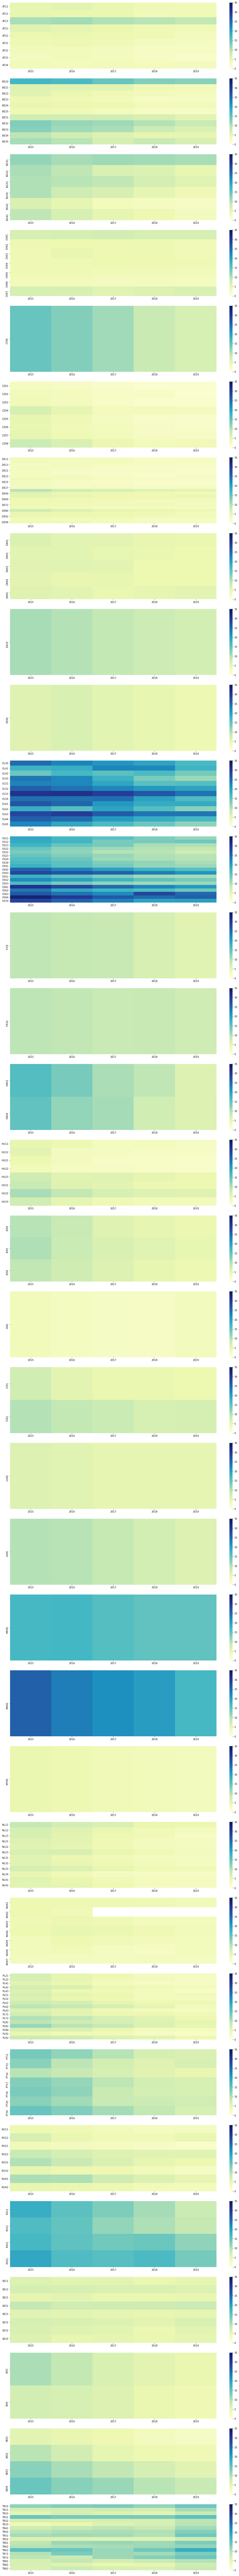

In [71]:
rows = 34

fig, axes = plt.subplots(nrows=rows, ncols=1, figsize=(16, 150))

i = 0

for r in range(0, rows):
        if i == len(indices_grouped):
            break 
            
        sb.heatmap(df[['2015', '2016', '2017', '2018', '2019']].loc[indices_grouped[i]], vmin=0, vmax=35, cmap='YlGnBu', ax=axes[r])
        axes[r].yaxis.set_label_text('')
        
        i = i + 1
                   
fig.tight_layout(pad=2.0)
plt.savefig('heatmap_grouped.jpg', dpi=400)